In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the training set

In [2]:
import pandas as pd

def read_training_set():
    data = pd.read_csv("housing-data.txt", delim_whitespace=True, header=None)
    X_train = data.iloc[:, :-1].values  # All columns except the last one as features
    Y_train = data.iloc[:, -1].values   # The last column as the target
    return X_train, Y_train


## z-score normalization

In [3]:
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    print("Mean of each column (feature):", mu)
    print("Standard deviation of each column (feature):", sigma)


    return (X_norm, mu, sigma)

### Model function

In [4]:
def calculate_model(x, w, b):
    return np.dot(x, w) + b

### Cost function

In [5]:
def calculate_cost(w: np.array, b, x: np.array, y: np.array):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        yh = calculate_model(x[i],w,b)
        cost += (yh - y[i])**2
    cost = cost / (2*m)
    return cost

### Compute Gradient

In [6]:
def compute_gradient(w, b, x: np.array, y: np.array):
    m, n = x.shape  # Fixed: removed parentheses
    dj_dw = np.zeros((n,))
    dj_db = 0  # Fixed: initialized dj_db
    
    for i in range(m):
        error = calculate_model(x[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i, j]
        dj_db = dj_db + error

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

# Gradient Descent

In [7]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, epsilon=1e-7):

    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    prev_cost = float('inf')

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(w, b, x, y)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        current_cost = cost_function(w, b, x, y)

        if i % 100 == 0:
            J_hist.append(current_cost)

        if abs(prev_cost - current_cost) < epsilon:
            return w, b, J_hist

        prev_cost = current_cost

    return w, b, J_hist

Mean of each column (feature): [3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
Standard deviation of each column (feature): [8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


C:\Users\phill\AppData\Local\Temp\ipykernel_33784\3156066758.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("housing-data.txt", delim_whitespace=True, header=None)


b,w found by gradient descent: 22.53,[-0.92682806  1.07924835  0.13370297  0.68276926 -2.05546057  2.67553757
  0.01835971 -3.10456438  2.6440595  -2.05614013 -2.05993433  0.84914086
 -3.74292663] 
Final cost: 10.947441677748316


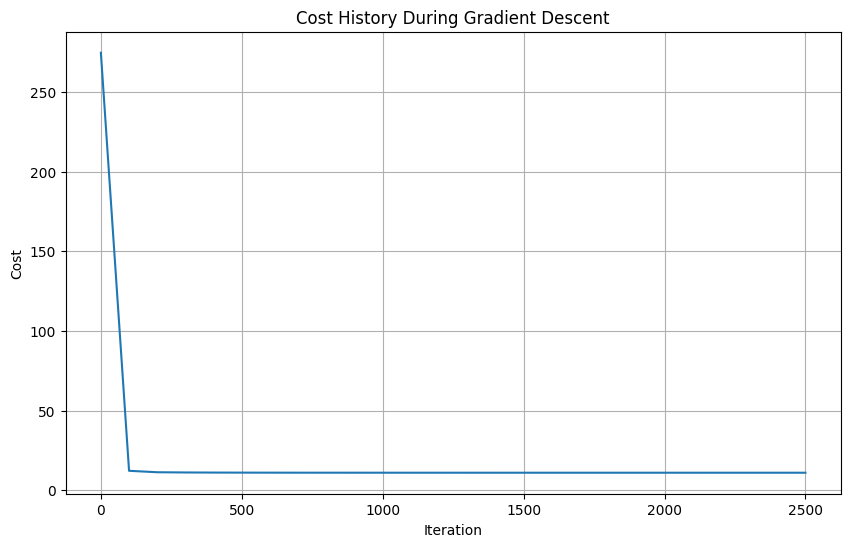

In [8]:
X_train, y_train = read_training_set()
X_train, mu, sigma = normalize(X_train)

# initialize parameters
w_init = np.zeros(X_train.shape[1])  # Fixed: initialize with correct shape
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 10000000
alpha = 0.03
epsilon = 1e-7

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                          calculate_cost, compute_gradient,
                                          alpha, iterations, epsilon)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"Final cost: {J_hist[-1]}")


# Plot cost vs iteration
# Plot cost vs iteration
plt.figure(figsize=(10, 6))
iterations_per_point = 100
iterations_completed = len(J_hist) * iterations_per_point
x_values = range(0, iterations_completed, iterations_per_point)
plt.plot(x_values, J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History During Gradient Descent")
plt.grid(True)
plt.show()

In [9]:
# Model Evaluation

# 1. Baseline: Predicting the mean value of y_train
baseline_prediction = np.mean(y_train)
y_baseline = np.full_like(y_train, baseline_prediction)  # Array with all entries equal to the mean
baseline_rmse = np.sqrt(np.mean((y_train - y_baseline) ** 2))
print(f"Baseline RMSE (predicting mean): {baseline_rmse:.2f} thousand dollars")

# 2. Custom Model: Use the learned parameters (w_final and b_final) for predictions
y_pred_custom = X_train.dot(w_final) + b_final  # Prediction: X*w + b
custom_rmse = np.sqrt(np.mean((y_train - y_pred_custom) ** 2))
print(f"Custom Model RMSE: {custom_rmse:.2f} thousand dollars")

# 3. Compare the performance
if custom_rmse < baseline_rmse:
    print("✅ Your custom model performs better than the baseline.")
else:
    print("❌ Your custom model does not improve over the baseline.")


Baseline RMSE (predicting mean): 9.19 thousand dollars
Custom Model RMSE: 4.68 thousand dollars
✅ Your custom model performs better than the baseline.
